# 3rd Question Answer

ElectroCardioGram (ECG) and ECG Signal is a recording of the electrical activity of the heart. Abbreviated ECG and EKG. An ECG is a simple, noninvasive procedure. Electrodes are placed on the skin of the chest and connected in a specific order to a machine that, when turned on, measures electrical activity all over the heart. Output usually appears on a long scroll of paper that displays a printed graph of activity on a computer screen. The initial diagnosis of heart attack is usually made through observation of a combination of clinical symptoms and characteristic ECG changes.
An ECG can detect areas of muscle deprived of oxygen and/or dead tissue in the heart. If a medication is known to sometimes adversely affect heart function, a baseline ECG may be ordered before the patient starts taking the medicine, and follow-up testing may occur at regular intervals to look for any changes.

# 4th Question Answer


 Length of time array is: 43081


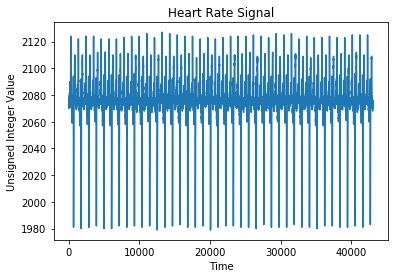

In [76]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook

%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file
cr = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Signal = np.fromfile(cr,count=-1,dtype=np.uint16)
print('\n Length of time array is: ' + str(len(Signal)) )

plt.plot(Signal)
plt.title("Heart Rate Signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")


# 5th Question Answer

We can see the 40 beats for whole dataline and the total samples obtained are 43081.
So we get 43081/40 = 1077 samples per beat
Therefore we get 5385 samples for 5 beats

# 6th Question Answer

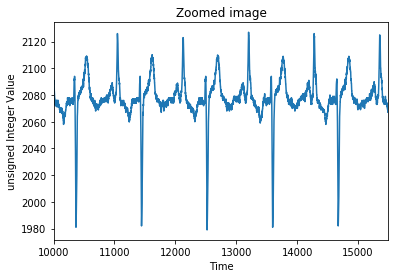

In [77]:
plt.xlim(10000,15500)
plt.plot(Signal)
plt.title("Zoomed image")
plt.xlabel("Time")
plt.ylabel("unsigned Integer Value")

# 7th Question Answer


The Heart Rate of the individual from the figure has a Lower Heart Rate.

# 8th Question Answer

The estimated heart rate will be Lesser than 60 bpm since the PR interval is smaller when compared to QT interval.

# 9th Question Answer


 Peak value is 4.98149090804


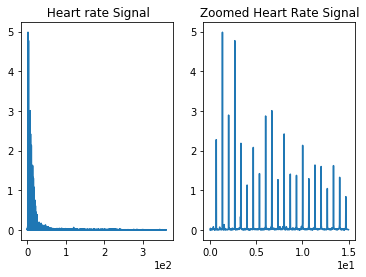

In [78]:
c = Signal[:43080]
#Here we obtain only the positive half of the signal
r = np.arange(21540)
#we need to eliminate any DC component in the signal
F_data = c-np.mean(c)
L = len(F_data)

#frequencies after performing fft will be between 0 and 1/2 of the actual sampling frequency
fa=np.arange(0,720/2.,720/43080.)
r=np.fft.fft(F_data)
#Here we are normalizing the positive frequencies
Pyy= abs(r)/L

plt.subplot(121)
plt.plot(fa,Pyy[:21540])
plt.title(' Heart rate Signal')
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,0))

#zooming into just less than 15Hz
inx=np.where(fa>15)
inx=inx[0]
plt.subplot(122)
plt.plot(fa[:inx[0]], Pyy[:inx[0]])
plt.title('Zoomed Heart Rate Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

pb=np.amax(Pyy[:21540])
print('\n Peak value is ' +str(pb) )

# 10th Question Answer

In [79]:
for index in y:
    if Pyy[index]>= 4.9814:
        print ('Maximum value at the frequency f=' +str(index/57.44) + ' Hz')
        break

Maximum value at the frequency f=1.39275766017 Hz


# 11th Question Answer

In [80]:
Hbt=60/1.39372
print("The Heart rate from the spectrum is  " +str(Hbt) +" bpm")

The Heart rate from the spectrum is  43.0502539965 bpm


# 12th Question Answer

The peaks contained in the signal implies the Heart Rate Signal and the smaller pekas,the presence of Noise.
The frequency at which the Peak is present can be useful to obtain the Heart Rate.
From the obtained signal,the Heart rate is measured as 60/F ,where F represents the frequency related to the Peak value.

# 13th Question Answer

Yes,there is a need for the filtering of the signal.
The filter flattens the frequency response and also the transition band becomes sharp.
This property of the filter becomes significant with the increase in the order of the filter.
But there is a catch to this,as the order of the filter increases the amplitude gets effected more.

# 14th and 15th Question Answer

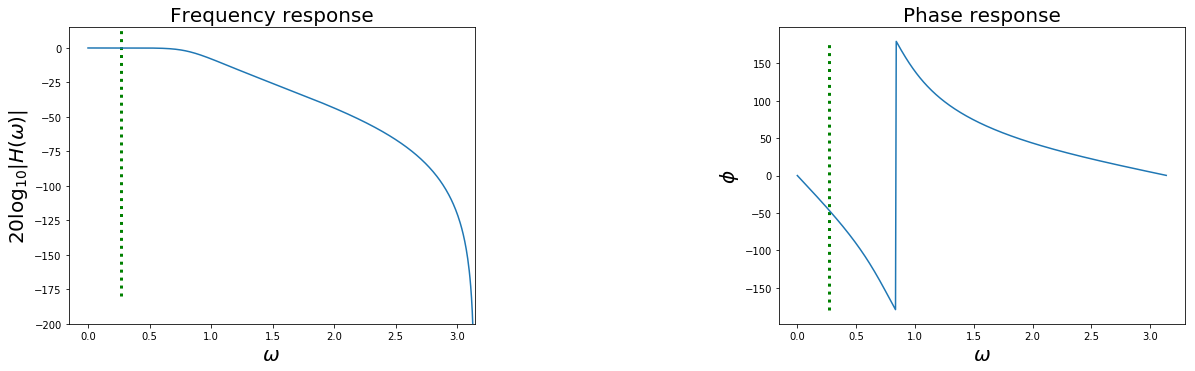

In [81]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
fig=plt.figure()
fig.set_size_inches((20,15))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)

fs=750 #sampling frequency
NF=fs/2 # nyquist frequency
cutoff= 100 # cutoff frequency
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low')
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,F_data) # output signal of the Butterworth filter

x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response',fontsize=20)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=20)
ax.set_xlabel(r'$\omega$ ',fontsize=20)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-200,ymax=15)
ax.vlines(Wn,-180,180,linestyles=':',color='g',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase response',fontsize=20)
ax.set_xlabel(r'$\omega$',fontsize=20)
ax.set_ylabel(r"$\phi $ ",fontsize=20)
ax.vlines(Wn,-180,180,linestyles=':',color='g',lw=3.)


# 16th Question Answer

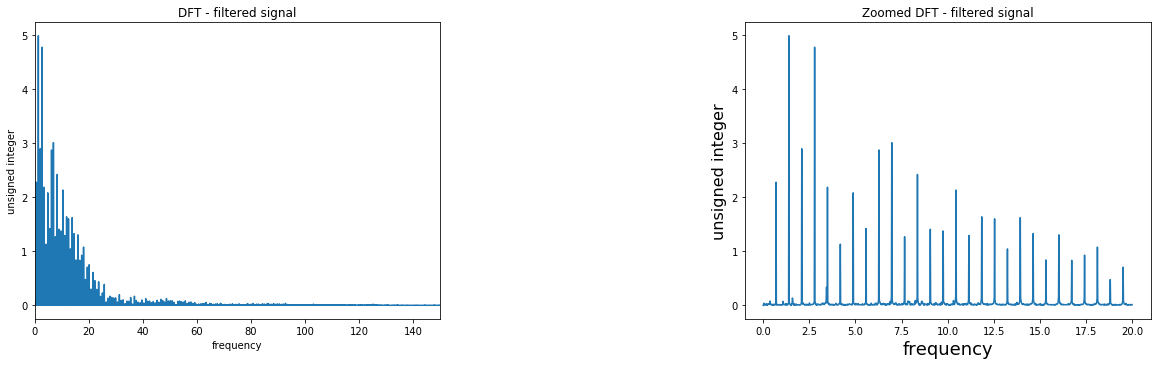

In [82]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,15))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
LL=len(s)
ff=np.arange(0,750,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#Here we are Normalizing only the Positive Frequencies
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:43080])
ax.set_title('DFT - filtered signal')
ax.set_xlabel('frequency')
ax.set_ylabel('unsigned integer')
ax.set_xlim(xmax = 150, xmin =0)
indx=np.where(ff>20)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('Zoomed DFT - filtered signal')
ax.set_xlabel('frequency',fontsize=18)
ax.set_ylabel('unsigned integer',fontsize=16)


# 17th Question Answer

The Butterworth Filter will have an effect on the Heart Rate Signal.
The Frequency Response of the Heart Rate Signal has become flatter over the frequencies 0 to 1.5 Hz.
The Transition becomes sharper due to the usage of Higher Order Filter (4th Order here).
Increasing the Order of the Filter sharpens the Transition band,but the disadvantage is that the Amplitude of the signal is effected by the Increase in the Order of the Filter.

# Bibliography :

1) http://www.idc-online.com/technical_references/pdfs/electrical_engineering/FILTERING%20OF%20ECG%20SIGNAL%20USING.pdf

2) https://www.youtube.com/watch?v=CQobilzURdE (How to zoom in for particular range in curve in matplotlib).

3) https://dsp.stackexchange.com/questions/34127/higher-order-butterworth-filters
   
4) https://electronics.stackexchange.com/questions/138830/relationship-between-order-of-filter-and-impulse-response

5) http://zone.ni.com/reference/en-XX/help/370859J-01/genmaths/genmaths/calc_filterfir_iir/